### Clasificacion KNN

Modelo de vecinos mas cercanos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\clasificacion_knn.csv')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


##### Vemos la relacion si la hay entre salary y purchased

* t-test entre salary y purchased

In [7]:
#Preparamos los grupos de la variable cualitativa (seleccionamos solo las variables que nos interesa estudiar)

df_C=df.loc[:,['EstimatedSalary']][df['Purchased']==1]
df_NoC=df.loc[:,['EstimatedSalary']][df['Purchased']==0]  # quite la columna 'purchased' no me sirve porque ya estan agrupados

# Al copiar el df esta manteniendo los indices

In [8]:
df_NoC.shape, df_C.shape # como habiamos visto la variable no esta compensada

((257, 1), (143, 1))

* Tengo que seleccionar aleatoriamente 143 datos de df_NoC

In [9]:
df_NoC=df_NoC.sample(143)

In [10]:
df_NoC.shape, df_C.shape

((143, 1), (143, 1))

In [15]:
import scipy
from scipy.stats import ttest_ind

In [16]:
# Realizo el t-test

ttest_ind(df_C, df_NoC)

Ttest_indResult(statistic=array([6.41154108]), pvalue=array([5.98863279e-10]))

In [17]:
# p-valor es muy pequeña

riesgo=0.05
p_value=ttest_ind(df_C, df_NoC) # variable trim para indicar el nivel de riesgo por defecto 0,05
print (p_value)
print('\nP-valor',p_value[1],'\n')
if p_value[1]>riesgo:
    print('Aceptamos H0: Las variables son independientes')
else:
    print('Rechazamos H0, aceptamos H1: Las variables tienen dependencia')

Ttest_indResult(statistic=array([6.41154108]), pvalue=array([5.98863279e-10]))

P-valor [5.98863279e-10] 

Rechazamos H0, aceptamos H1: Las variables tienen dependencia


##### Vemos la relacion si la hay entre Edad y purchased

In [18]:
#Preparamos los grupos de la variable cualitativa (seleccionamos solo las variables que nos interesa estudiar)

dfE_C=df.loc[:,['Age']][df['Purchased']==1]
dfE_NoC=df.loc[:,['Age']][df['Purchased']==0]  # quite la columna 'purchased' no me sirve porque ya estan agrupados


In [19]:
dfE_NoC.shape, dfE_C.shape # como habiamos visto la variable no esta compensada

((257, 1), (143, 1))

Tengo que seleccionar aleatoriamente 143 datos de df_NoC

In [20]:
dfE_NoC=df_NoC.sample(143)
dfE_NoC.shape, df_C.shape

((143, 1), (143, 1))

In [22]:
# Realizo el t-test
ttest_ind(dfE_C, dfE_NoC)
# p-valor es muy pequeña


Ttest_indResult(statistic=array([-30.39937892]), pvalue=array([2.78024709e-91]))

In [23]:
riesgo=0.05
p_valueE=ttest_ind(dfE_C, dfE_NoC) # variable trim para indicar el nivel de riesgo por defecto 0,05
print (p_valueE)
print('\nP-valor',p_valueE[1],'\n')
if p_valueE[1]>riesgo:
    print('Aceptamos H0: Las variables son independientes')
else:
    print('Rechazamos H0, aceptamos H1: Las variables tienen dependencia')

Ttest_indResult(statistic=array([-30.39937892]), pvalue=array([2.78024709e-91]))

P-valor [2.78024709e-91] 

Rechazamos H0, aceptamos H1: Las variables tienen dependencia


UNA VEZ COMPROBADA LA RELACION DE EDAD Y SALARIO CON COMPRA PROCEDEMOS A LA ELABORACION DE MODELO

#### Dummys y Missing no hay

In [26]:
df.isnull().value_counts()

Age    EstimatedSalary  Purchased
False  False            False        400
dtype: int64

In [29]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


#### Seleccion de variables

Ya hemos comprobado en este DF que las variables de edad y salario tienen relacion con la variable objetivo(compra o no)

#### Separar variables dependiente/independiente

In [30]:
y=df.iloc[:,2].values

In [31]:
x=df.iloc[:,[0,1]].values

#### Separacion training/test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1987)

#### Normalizacion/estandarizacion en este modelo SI que hay que hacerlo.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [37]:
#x_test

#### Crear el modelo KNN

Este modelo asigna un valor lo mas cercano a los n vecinos mas proximos.

* Parametros:

    - n_neighbors: numero de vecinos proximos a considerar. Por defecto 5.
    - weights: peso (opciones uniforme o por distancia). Por defecto uniforme.
    - algoritm: algoritmo para encontrar vecinos proximos. Por defecto automatico.
    - p (metric_params): numero de variables para predecir
    

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
num_var_indep=2 # (edad y salario)

In [50]:
clasificador=KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=num_var_indep)
clasificador.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

#### Prediccion

In [51]:
clasificador.predict(x_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

##### Evaluacion del modelo mediante matriz de confusion o contingencia

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
matriz_conf=confusion_matrix(y_test, clasificador.predict(x_test))
matriz_conf  # Total 120 (400*0.3)

array([[69,  6],
       [ 5, 40]], dtype=int64)

* VP=69
* FP=6
* FN=5
* VN=40

In [47]:
# Metricas de la matriz

## Funcion de evaluacion
def Evaluacion_ClasificacionRL(matriz_conting):
    precision_precision=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[0,1])
    accuracy_exactitud=(matriz_conf[0,0]+matriz_conf[1,1])/matriz_conf.sum()
    specifity_especificidad=matriz_conf[1,1]/(matriz_conf[1,1]+matriz_conf[0,1])
    recall_sensibilidad=matriz_conf[0,0]/(matriz_conf[0,0]+matriz_conf[1,0])
    f1_score=2*precision_precision*recall_sensibilidad/(precision_precision+recall_sensibilidad)
    print(f"Precision: {precision_precision:.2f}\nExactitud: {accuracy_exactitud:.2f}\nEspecificidad: {specifity_especificidad:.2f}\nSensibilidad: {recall_sensibilidad:.2f}\nPuntuación F1: {f1_score:.2f}")
    

In [54]:
Evaluacion_ClasificacionRL(matriz_conf)

Precision: 0.92
Exactitud: 0.91
Especificidad: 0.87
Sensibilidad: 0.93
Puntuación F1: 0.93


#### Visualizacion del Modelo

C:\Users\carolina\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


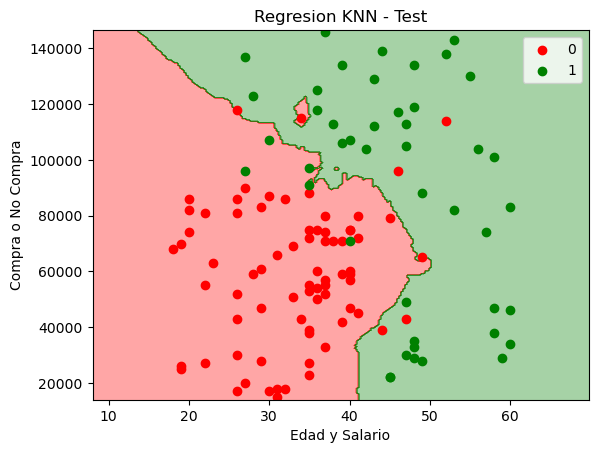

In [55]:
from matplotlib.colors import ListedColormap 
x_set, y_set = sc_x.inverse_transform(x_test), y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-10, stop = x_set[:,0].max()+10, step=0.25), np.arange(start=x_set[:,1].min()-1000, stop=x_set[:,1].max()+1000, step=500)) # coord x e y
plt.contourf(x1,x2,clasificador.predict(sc_x.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.35,cmap=ListedColormap(('red','green'))) # ravel() aplana la matriz
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c = ListedColormap(('red','green'))(i),label=j)
plt.title('Regresion KNN - Test')
plt.xlabel('Edad y Salario')
plt.ylabel('Compra o No Compra')
plt.legend()
plt.show()

Hay islas rosas y verdes que indican sobre parametrizacion. 
Cambiamos parametros vecinos de 5 a 10. Algo ha mejorado la grafica. 
Se puede seguir modificando los parametros del modelo para intentar ajustarlo mejor.